# Importing Libraries

In [1]:
import numpy as np #arrays functions
import pandas as pd #statistical analysis
import matplotlib.pyplot as plt #data visualisation (graphs and plots; built on R)
import seaborn as sns #data visualisation (numpy:pandas::pyplot:seaborn)

%matplotlib inline

# Loading Dataset

In [2]:
df = pd.read_csv('../tic-tac-toe.data', names=['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'Result'])
df

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Result
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [3]:
df.isnull().sum()

TL        0
TM        0
TR        0
ML        0
MM        0
MR        0
BL        0
BM        0
BR        0
Result    0
dtype: int64

The data is purely categorical and so, we do not need to do any actual data analysis.

# Feature Engineering

In [4]:
for i in df:
    for j in range(len(df[i])):
        if df[i][j] == 'x':
            df[i][j] = 1
        elif df[i][j] == 'o':
            df[i][j] = 2
        elif df[i][j] == 'b':
            df[i][j] = 0

for i in range(len(df['Result'])):
    if df['Result'][i] == 'positive':
        df['Result'][i] = 'X Won'
    else:
        df['Result'][i] = 'O Won'
df

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Result
0,1,1,1,1,2,2,1,2,2,X Won
1,1,1,1,1,2,2,2,1,2,X Won
2,1,1,1,1,2,2,2,2,1,X Won
3,1,1,1,1,2,2,2,0,0,X Won
4,1,1,1,1,2,2,0,2,0,X Won
...,...,...,...,...,...,...,...,...,...,...
953,2,1,1,1,2,2,2,1,1,O Won
954,2,1,2,1,1,2,1,2,1,O Won
955,2,1,2,1,2,1,1,2,1,O Won
956,2,1,2,2,1,1,1,2,1,O Won


In [5]:
x_col = df.drop(columns=['Result'], axis=1)
y_col = df['Result']

# Model training and evaluation

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB

## Applying Naive Bayes

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_col, y_col, test_size=0.3, random_state=0)

In [14]:
nb = CategoricalNB()
nb.fit(x_train, y_train)
nbPredict = nb.predict(x_test)

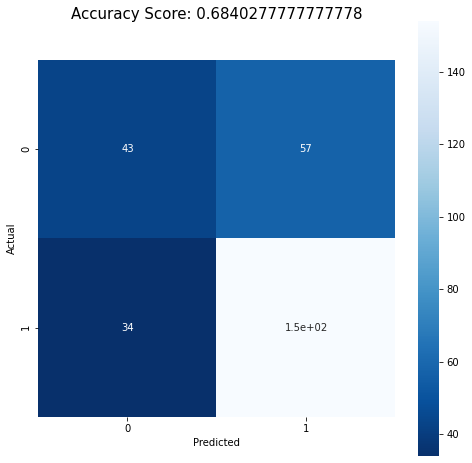

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(y_test, nbPredict), annot=True, square = True, cmap='Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}\n\n'.format(metrics.accuracy_score(y_test, nbPredict))
plt.title(all_sample_title, size = 15);

In [15]:
print('Classification report for decision tree values:\n')
print(classification_report(y_test, nbPredict))

Classification report for decision tree values:

              precision    recall  f1-score   support

       O Won       0.56      0.43      0.49       100
       X Won       0.73      0.82      0.77       188

    accuracy                           0.68       288
   macro avg       0.64      0.62      0.63       288
weighted avg       0.67      0.68      0.67       288



The accuracy is very poor as is clearly visible. The most obvious reason is that Naive Bayes works for datasets which have got no correlation with each other and the attributes are totally independent. In a game of tic-tac-toe, it is the exact opposite. The state of the board is very important in deciding the result.

## Applying Decision Trees

In [23]:
trainedTree = DecisionTreeClassifier(max_depth=5)
trainedTree.fit(x_train, y_train)
treePredict = trainedTree.predict(x_test)

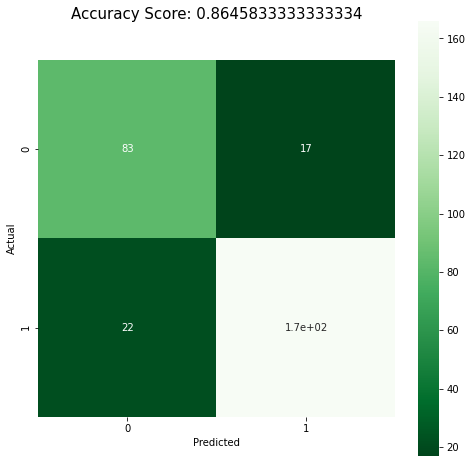

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(y_test, treePredict), annot=True, square = True, cmap='Greens_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}\n\n'.format(metrics.accuracy_score(y_test, treePredict))
plt.title(all_sample_title, size = 15);

In [25]:
print('Classification report for decision tree values:\n')
print(classification_report(y_test, treePredict))

Classification report for decision tree values:

              precision    recall  f1-score   support

       O Won       0.79      0.83      0.81       100
       X Won       0.91      0.88      0.89       188

    accuracy                           0.86       288
   macro avg       0.85      0.86      0.85       288
weighted avg       0.87      0.86      0.87       288



Decision trees is quite capable and useful for this dataset. We can easily keep track of states in a decision tree which means that if there is any correlation between the values, it is taken care of. That's why it can, quite effectively, determine the victories.